In [3]:
from astropy.io import fits,ascii
from matplotlib import table
from numpy import *
import matplotlib.pyplot as plt
from astropy.table import Table
from roman import toRoman
from scipy.interpolate import interp2d,interp1d
from scipy.optimize import fsolve
from roman import toRoman

In [3]:
plt.style.use('Files_n_figures/my_style.mpl')

hdu=fits.open('Data/component_II_nH_Z_const_T_col_density_param.fits')
data=Table(hdu[1].data)

log_nH=data['log_nH']
log_Z=data['log_Z']
col_den_OVI=log10(data['O+5'])

N_OVI=14.26

ions=['Si+', 'Si+2','C+', 'C+2']
ions_label=[f'Si {toRoman(2)}', f'Si {toRoman(3)}',f'C {toRoman(2)}', f'C {{toRoman(3)}']

upper_col_den=[12.4,12.3,13.3,'NA']
upper_lim=dict(zip(ions,upper_col_den))

In [ ]:

for z in arange(-3,-2,0.05):
    z=round(z,2)
    mask=log_Z==-z
    nH=log_nH[mask]

    plt.plot(nH,log10(data['H+'])[mask],label=f'{z}')

plt.legend()
plt.show()


[-0.41271532]


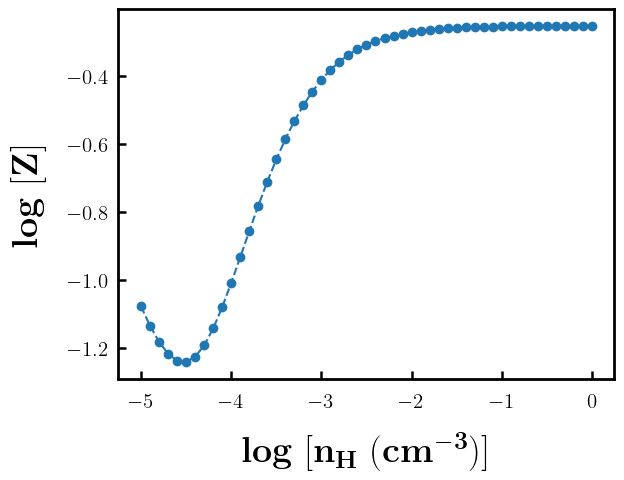

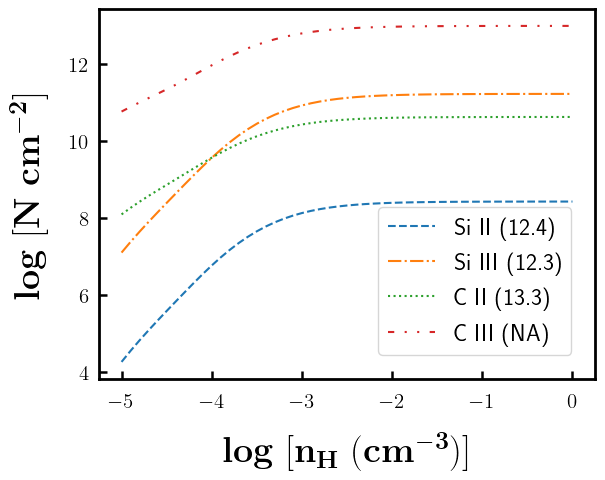

In [5]:
def Z_solve(nH):

    mask=log_nH==nH

    log_Z_mask=log_Z[mask]
    col_den_OVI_mask=col_den_OVI[mask]

    f=interp1d(log_Z_mask,col_den_OVI_mask,kind='cubic')

    def func(x):
        return f(x)-N_OVI

    Z=fsolve(func,-1)
    col_den_ions_dict={}

    for i in ions:
        col_den_ion=log10(data[i])[mask]
        f_interp=interp1d(log_Z_mask,col_den_ion,kind='cubic')
        col_den_ions_dict[i]=f_interp(Z)

    return Z, col_den_ions_dict

    
nH=arange(-5,0.1,0.1)
Z=[]
# col_den_ions_dict={'Si+':[],'Si+2':[],'C+':[],'C+2':[]}

col_den_ions_dict={'Si+':[],'Si+2':[],'C+':[],'C+2':[]}
ions_label=[f'Si {toRoman(2)}', f'Si {toRoman(3)}',f'C {toRoman(2)}', f'C {toRoman(3)}']
ls=['dashed','dashdot','dotted',(0, (3, 5, 1, 5, 1, 5)),'solid']


for n in nH:
    n=round(n,2)
    z,col_den_ions=Z_solve(n)
    if n==-3.0:
        print(z)
    Z.append(z)

    for i in ions:
        col_den_ions_dict[i].append(col_den_ions[i])


plt.figure()
plt.plot(nH,Z,ls='--')
plt.scatter(nH,Z)
plt.ylabel(r'$\mathbf{log \ [Z]}$',labelpad=15)
plt.xlabel(r'$\mathbf{log \ [n_H \ ({cm}^{-3})]}$',labelpad=15)

plt.figure()
    
for i,ion in enumerate(ions):
    plt.plot(nH,col_den_ions_dict[ion],ls=ls[i],label=f'{ions_label[i]} ({upper_lim[ion]})')

plt.legend()
plt.ylabel(r'$\mathbf{log \ [N \ {cm}^{-2}]}$',labelpad=15)
plt.xlabel(r'$\mathbf{log \ [n_H \ ({cm}^{-3})]}$',labelpad=15)

plt.show()


In [8]:
def physical_param(NHI,NHII,log_nH,log_T,model):

    log_NH=log10(NHI+NHII)
    l=((NHI+NHII)/(10**log_nH))*(3.2408e-22)
    P_k=10**(log_nH+log_T)

    print(f'{model} : NH = {round(log_NH,3)}    l = {round(l,2)} kpc    T = {round(10**log_T)} K     P = {round(P_k,2)}')


physical_param(1.34896e+14,	4.11841e+19,-3,5.29,'comp_II_CIE')
physical_param(1.34896e+14,	2.80954e+18,-4.51,4.397,'comp_II_PIE')
physical_param(1.25893e+16,	8.19728e+17,-2.24,4.011,'comp_III_PIE_exc_OVI')
physical_param(1.25892e+16,	7.35116e+19,-3.88,4.446,'comp_III_PIE_inc_OVI')

comp_II_CIE : NH = 19.615    l = 13.35 kpc    T = 194984 K     P = 194.98
comp_II_PIE : NH = 18.449    l = 29.47 kpc    T = 24946 K     P = 0.77
comp_III_PIE_exc_OVI : NH = 17.92    l = 0.05 kpc    T = 10257 K     P = 59.02
comp_III_PIE_inc_OVI : NH = 19.866    l = 180.75 kpc    T = 27925 K     P = 3.68


/tmp/ipykernel_12675/1621812196.py:16: RuntimeWarning: divide by zero encountered in log10
  plt.plot(nH,log10(data[ion]),label=ions_label[i],ls=ls[i])


Text(0, 0.5, '$log \\ [N \\ ({cm}^{-2})]$')

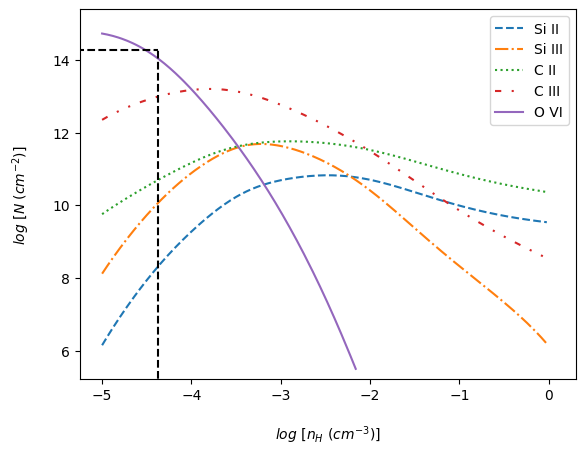

In [7]:
hdu=fits.open('Data/component_II_nH_col_density_param.fits')
data=Table(hdu[1].data)

mask=data['H']!=0
data=data[mask]

nH=data['log_nH']
ions=['Si+', 'Si+2','C+', 'C+2', 'O+5']
ions_label=[f'Si {toRoman(2)}', f'Si {toRoman(3)}',f'C {toRoman(2)}', f'C {toRoman(3)}',f'O {toRoman(6)}']

obs_OVI=14.26   

ls=['dashed','dashdot','dotted',(0, (3, 5, 1, 5, 1, 5)),'solid']

for i,ion in enumerate(ions):
    plt.plot(nH,log10(data[ion]),label=ions_label[i],ls=ls[i])

plt.hlines(obs_OVI,xmin=-6.5,xmax=-4.3729,color='black',ls='--')
plt.vlines(-4.3729,ymin=1.35,ymax=obs_OVI,color='black',ls='--')
plt.legend()
plt.xlim(left=-5.25)
plt.ylim(bottom=5.22)
plt.xlabel(r'$log \ [n_H \ ({cm}^{-3})]$',labelpad=15)
plt.ylabel(r'$log \ [N \ ({cm}^{-2})]$',labelpad=15)
# plt.show()


In [2]:
from numpy import log10

b=38.1
b_err=6.5

T=(b/0.129)**2
T_err=2*(1/0.129**2)*b*b_err

print(T,log10(T),log10(T-T_err),log10(T+T_err))

87230.93564088695 4.94067053075274 4.759419276558159 5.068166455211834
